In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import log10
%matplotlib inline
start_time = pd.datetime.now()
import copy
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
import xgboost as xgb
#from categroy_encoders import TargetEncoder

In [2]:
train_test=pd.read_csv('train_test.csv',index_col=0)
OOT=pd.read_csv('ootdata.csv',index_col=0)
oot=OOT[train_test.columns.to_list()]

In [3]:
#split
X=train_test.drop('Fraud', axis=1)
#split the data into train and test
y=train_test['Fraud'] #label

In [4]:
def FDR(model,i):
    prop=0.03
    len_train=round(len(x_train)*prop)
    len_test=round(len(x_test)*prop)
    len_oot=round(len(oot)*prop)
    pred_train=model.predict_proba(x_train)[:,1]
    lg_train=pd.DataFrame({'Pred': pred_train, 'Fraud':y_train}).sort_values(by='Pred',ascending=False).head(len_train)
    pred_test=model.predict_proba(x_test)[:,1]
    lg_test=pd.DataFrame({'Pred': pred_test, 'Fraud':y_test}).sort_values(by='Pred',ascending=False).head(len_test)
    pred_oot=model.predict_proba(oot.drop('Fraud',axis=1))[:,1]
    lg_oot=pd.DataFrame({'Pred': pred_oot, 'Fraud':oot.Fraud}).sort_values(by='Pred',ascending=False).head(len_oot)
    FDR_train=sum(lg_train.Fraud)/sum(y_train)
    FDR_test=sum(lg_test.Fraud)/sum(y_test)
    FDR_oot=sum(lg_oot.Fraud)/sum(oot.Fraud)
    df_FDR=pd.DataFrame({'Train': FDR_train, 'Test':FDR_test,'OOT':FDR_oot},index=[i])
    return (df_FDR)

#### baseline linear model (logistic regression)
#### c=10, balanced is the best 

In [58]:
df_logistic=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

In [83]:
## set parameter 
C=1000
model = LogisticRegression(C=C,solver="lbfgs",class_weight='balanced',max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic['Parameter']="c=1000"

In [84]:
df_logistic.sort_values('Test',ascending=False)

,Train,Test,OOT,Parameter
9,0.737676,0.779264,0.491620,c=1000
7,0.732743,0.778146,0.497207,c=1000
4,0.746503,0.769492,0.536313,c=1000
3,0.741117,0.760870,0.530726,c=1000
1,0.754783,0.750000,0.541899,c=1000
6,0.763573,0.736486,0.553073,c=1000
2,0.763293,0.728873,0.564246,c=1000
5,0.753927,0.727891,0.486034,c=1000
8,0.757042,0.722408,0.502793,c=1000
0,0.771529,0.718121,0.502793,c=1000


In [85]:
C=100
model = LogisticRegression(C=C,solver="lbfgs",class_weight='balanced',max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic['Parameter']="c=100"
df_logistic.sort_values('Test',ascending=False)

,Train,Test,OOT,Parameter
9,0.748700,0.762069,0.553073,c=100
0,0.751323,0.750000,0.497207,c=100
2,0.760832,0.748276,0.541899,c=100
5,0.744144,0.746795,0.480447,c=100
8,0.752311,0.745399,0.564246,c=100
3,0.743636,0.744479,0.530726,c=100
6,0.761246,0.733564,0.547486,c=100
7,0.756849,0.731449,0.530726,c=100
1,0.756803,0.731183,0.519553,c=100
4,0.757315,0.706294,0.525140,c=100


In [86]:
C=10
model = LogisticRegression(C=C,solver="lbfgs",class_weight='balanced',max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic['Parameter']="c=10"
df_logistic.sort_values('Test',ascending=False)

,Train,Test,OOT,Parameter
6,0.734024,0.809028,0.530726,c=10
8,0.727273,0.789831,0.519553,c=10
1,0.742424,0.772894,0.530726,c=10
4,0.748252,0.766102,0.547486,c=10
3,0.743409,0.765101,0.497207,c=10
7,0.742710,0.757042,0.486034,c=10
9,0.761905,0.745520,0.491620,c=10
5,0.758497,0.733766,0.458101,c=10
2,0.773038,0.718861,0.502793,c=10
0,0.776430,0.717241,0.564246,c=10


In [87]:
C=1
model = LogisticRegression(C=C,solver="lbfgs",class_weight='balanced',max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic['Parameter']="c=1"
df_logistic.sort_values('Test',ascending=False)

,Train,Test,OOT,Parameter
7,0.750859,0.778947,0.491620,c=1
1,0.752669,0.777049,0.502793,c=1
0,0.745363,0.773723,0.463687,c=1
5,0.749546,0.762658,0.480447,c=1
3,0.740103,0.755245,0.491620,c=1
2,0.759162,0.755102,0.508380,c=1
8,0.760360,0.740385,0.547486,c=1
6,0.770053,0.728758,0.486034,c=1
9,0.780576,0.720257,0.497207,c=1
4,0.786311,0.716418,0.513966,c=1


In [88]:
C=10
model = LogisticRegression(C=C,solver="lbfgs",max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic['Parameter']="c=10"
df_logistic.sort_values('Test',ascending=False)

,Train,Test,OOT,Parameter
5,0.727592,0.771812,0.340782,c=10
0,0.717117,0.766026,0.351955,c=10
2,0.729310,0.759582,0.363128,c=10
6,0.740675,0.730263,0.368715,c=10
7,0.726786,0.713355,0.307263,c=10
4,0.742504,0.710000,0.363128,c=10
8,0.735537,0.709924,0.346369,c=10
3,0.736041,0.706522,0.346369,c=10
9,0.745201,0.697279,0.351955,c=10
1,0.751342,0.675325,0.351955,c=10


### Random Forest
### n_estimators=100 , max_depth=10 , max_features=20 is the best

In [17]:
df_rf=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

In [36]:
n_estimators=100
max_depth=10
max_features=20
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)

In [37]:
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

In [38]:
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
1,0.928070,0.888889,0.625698,100,10,20
4,0.924915,0.882562,0.608939,100,10,20
0,0.936015,0.881250,0.608939,100,10,20
5,0.935154,0.875445,0.603352,100,10,20
3,0.933105,0.869718,0.620112,100,10,20
6,0.919521,0.869258,0.620112,100,10,20
2,0.927586,0.867596,0.642458,100,10,20
8,0.917857,0.863192,0.620112,100,10,20
7,0.930435,0.863014,0.636872,100,10,20
9,0.929453,0.830000,0.614525,100,10,20


In [34]:
n_estimators=60
max_depth=15
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

In [35]:
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
6,0.986418,0.920863,0.608939,60,15,30
9,0.989418,0.900000,0.547486,60,15,30
1,0.989510,0.894915,0.586592,60,15,30
2,0.982609,0.893836,0.614525,60,15,30
3,0.989601,0.889655,0.581006,60,15,30
5,0.991135,0.884488,0.614525,60,15,30
0,0.992844,0.879870,0.581006,60,15,30
7,0.998273,0.878472,0.575419,60,15,30
4,0.986577,0.878229,0.547486,60,15,30
8,0.978188,0.878229,0.603352,60,15,30


In [39]:
n_estimators=100
max_depth=20
max_features=20
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

In [40]:
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
1,1.0,0.938462,0.631285,100,20,20
0,1.0,0.933824,0.625698,100,20,20
8,1.0,0.933798,0.625698,100,20,20
9,1.0,0.933798,0.625698,100,20,20
7,1.0,0.920792,0.608939,100,20,20
3,1.0,0.920290,0.603352,100,20,20
4,1.0,0.913183,0.620112,100,20,20
2,1.0,0.909408,0.620112,100,20,20
5,1.0,0.902280,0.620112,100,20,20
6,1.0,0.896104,0.608939,100,20,20


### boosted tree
### didn't perform better than random forest

In [25]:
df_xgb=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

n_estimators=600
learning_rate=0.1
max_depth=5

model_xgb = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)

In [27]:
df_xgb['n_estimators']=n_estimators
df_xgb['max_depth']=max_depth
df_xgb['learning_rate']=learning_rate

In [28]:
df_xgb

,Train,Test,OOT,n_estimators,max_depth,learning_rate
0,1.0,0.950570,0.564246,600,5,0.1
1,1.0,0.952229,0.581006,600,5,0.1
2,1.0,0.936877,0.569832,600,5,0.1
3,1.0,0.952830,0.592179,600,5,0.1
4,1.0,0.952862,0.525140,600,5,0.1
5,1.0,0.942675,0.603352,600,5,0.1
6,1.0,0.924731,0.592179,600,5,0.1
7,1.0,0.923323,0.558659,600,5,0.1
8,1.0,0.969697,0.491620,600,5,0.1
9,1.0,0.948220,0.586592,600,5,0.1


In [29]:
n_estimators=500
learning_rate=1
max_depth=3

model_xgb = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)

In [31]:
df_xgb['n_estimators']=n_estimators
df_xgb['max_depth']=max_depth
df_xgb['learning_rate']=learning_rate
df_xgb

,Train,Test,OOT,n_estimators,max_depth,learning_rate
0,1.0,0.951049,0.536313,500,3,1
1,1.0,0.932515,0.385475,500,3,1
2,1.0,0.934426,0.368715,500,3,1
3,1.0,0.923077,0.497207,500,3,1
4,1.0,0.920382,0.463687,500,3,1
5,1.0,0.915254,0.424581,500,3,1
6,1.0,0.941818,0.480447,500,3,1
7,1.0,0.920266,0.558659,500,3,1
8,1.0,0.903226,0.407821,500,3,1
9,1.0,0.957295,0.424581,500,3,1


In [32]:
n_estimators=1000
learning_rate=0.01
max_depth=6

model_xgb = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)

In [33]:
df_xgb['n_estimators']=n_estimators
df_xgb['max_depth']=max_depth
df_xgb['learning_rate']=learning_rate
df_xgb

,Train,Test,OOT,n_estimators,max_depth,learning_rate
0,0.996503,0.935593,0.631285,1000,6,0.01
1,0.993139,0.911972,0.636872,1000,6,0.01
2,0.994755,0.911864,0.525140,1000,6,0.01
3,0.994845,0.901754,0.653631,1000,6,0.01
4,0.989455,0.916107,0.581006,1000,6,0.01
5,0.996558,0.916084,0.642458,1000,6,0.01
6,0.998291,0.936170,0.620112,1000,6,0.01
7,0.994652,0.872549,0.597765,1000,6,0.01
8,0.994652,0.950980,0.575419,1000,6,0.01
9,0.991379,0.954704,0.625698,1000,6,0.01


In [5]:
df_xgb=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

n_estimators=800
learning_rate=0.001
max_depth=4

model_xgb = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)

In [6]:
df_xgb['n_estimators']=n_estimators
df_xgb['max_depth']=max_depth
df_xgb['learning_rate']=learning_rate
df_xgb

,Train,Test,OOT,n_estimators,max_depth,learning_rate
0,0.756614,0.706667,0.519553,800,4,0.001
1,0.705151,0.657895,0.391061,800,4,0.001
2,0.778169,0.755853,0.586592,800,4,0.001
3,0.794118,0.740484,0.592179,800,4,0.001
4,0.758319,0.722973,0.569832,800,4,0.001
5,0.730298,0.658784,0.446927,800,4,0.001
6,0.808244,0.763754,0.603352,800,4,0.001
7,0.761649,0.705502,0.547486,800,4,0.001
8,0.785124,0.687023,0.597765,800,4,0.001
9,0.765018,0.707641,0.631285,800,4,0.001


### Apply Random Forest model on train,test,oot

In [9]:
n_estimators=100
max_depth=10
max_features=20
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
### trainning
prop=0.2
pred_train=model_rf.predict_proba(x_train)[:,1]
result_train=pd.DataFrame({'Pred': pred_train, 'Fraud':y_train}).sort_values(by='Pred',ascending=False)
result_train_part=result_train.head(round(len(x_train)*prop))
    
bin_df=pd.DataFrame(np.zeros(shape=(20,10)),columns=["Population","# Records","# Goods","# Bads","% Goods","% Bads",
                                                   "Total # Records","Cum Goods","Cum Bads","FPR"])
cum_df=pd.DataFrame(np.zeros(shape=(20,3)),columns=["% Good","% Bad(FDR)","KS"])


In [11]:
bin_qcut = result_train_part.copy().reset_index(drop=True).reset_index()
bin_qcut['qcut_group'] = pd.qcut(bin_qcut['index'], 20,labels=False)
population=range(1,21,1)
bin_df["Population"]=population

In [12]:
n_records=bin_qcut.groupby('qcut_group').size()
bin_df['# Records']=n_records

In [13]:
n_bads=bin_qcut.groupby('qcut_group')['Fraud'].sum()
bin_df['# Bads']=n_bads
n_goods=n_records-n_bads
bin_df['# Goods']=n_goods
bin_df['% Goods']=round(n_goods/n_records*100,2)
bin_df['% Bads']=round(n_bads/n_records*100,2)
bin_df["Total # Records"]=np.cumsum(n_records)  
bin_df["Cum Goods"]=np.cumsum(n_goods)
bin_df["Cum Bads"]=np.cumsum(n_bads)
bin_df["FPR"]=round(bin_df["Cum Goods"]/bin_df["Cum Bads"],2)

In [14]:
FDR_train_bad=[]
FDR_train_good=[]
for p in population:
    result_train_p=result_train.head(round(len(x_train)*p*0.01))
    bad=sum(result_train_p.Fraud)/sum(y_train)
    good=(len(result_train_p)-sum(result_train_p.Fraud))/(len(y_train)-sum(y_train))
    FDR_train_bad.append(round(bad*100,2))
    FDR_train_good.append(round(good*100,2))
    

In [15]:
cum_df['% Bad(FDR)']= FDR_train_bad
cum_df['% Good']=FDR_train_good
cum_df['KS']=cum_df['% Bad(FDR)']-cum_df['% Good']

In [16]:
train_table=pd.concat([bin_df,cum_df],axis=1)

In [17]:
train_table

,Population,# Records,# Goods,# Bads,% Goods,% Bads,Total # Records,Cum Goods,Cum Bads,FPR,% Good,% Bad(FDR),KS
0,1,532,44,488,8.27,91.73,532,44,488,0.09,0.08,85.61,85.53
1,2,531,494,37,93.03,6.97,1063,538,525,1.02,1.02,92.11,91.09
2,3,531,529,2,99.62,0.38,1594,1067,527,2.02,2.03,92.46,90.43
3,4,531,525,6,98.87,1.13,2125,1592,533,2.99,3.03,93.51,90.48
4,5,532,531,1,99.81,0.19,2657,2123,534,3.98,4.04,93.68,89.64
5,6,531,531,0,100.00,0.00,3188,2654,534,4.97,5.05,93.68,88.63
6,7,531,530,1,99.81,0.19,3719,3184,535,5.95,6.06,93.86,87.80
7,8,531,528,3,99.44,0.56,4250,3712,538,6.90,7.06,94.39,87.33
8,9,531,530,1,99.81,0.19,4781,4242,539,7.87,8.07,94.56,86.49
9,10,532,532,0,100.00,0.00,5313,4774,539,8.86,9.08,94.56,85.48


In [27]:
title_train=pd.DataFrame({'# Records':len(x_train),'# Bads': sum(y_train), '# Goods':len(x_train)-sum(y_train),
                    'Fraud Rate': sum(y_train)/len(y_train)},index=[0])
title_train

,# Records,# Bads,# Goods,Fraud Rate
0,53125,570,52555,0.010729


In [18]:
### test
prop=0.2
pred_test=model_rf.predict_proba(x_test)[:,1]
result_test=pd.DataFrame({'Pred': pred_test, 'Fraud':y_test}).sort_values(by='Pred',ascending=False)
result_test_part=result_test.head(round(len(x_test)*prop))
    
bin_df=pd.DataFrame(np.zeros(shape=(20,10)),columns=["Population","# Records","# Goods","# Bads","% Goods","% Bads",
                                                   "Total # Records","Cum Goods","Cum Bads","FPR"])
cum_df=pd.DataFrame(np.zeros(shape=(20,3)),columns=["% Good","% Bad(FDR)","KS"])


In [20]:
bin_qcut = result_test_part.copy().reset_index(drop=True).reset_index()
bin_qcut['qcut_group'] = pd.qcut(bin_qcut['index'], 20,labels=False)
population=range(1,21,1)
bin_df["Population"]=population
n_records=bin_qcut.groupby('qcut_group').size()
bin_df['# Records']=n_records
n_bads=bin_qcut.groupby('qcut_group')['Fraud'].sum()
bin_df['# Bads']=n_bads
n_goods=n_records-n_bads
bin_df['# Goods']=n_goods
bin_df['% Goods']=round(n_goods/n_records*100,2)
bin_df['% Bads']=round(n_bads/n_records*100,2)
bin_df["Total # Records"]=np.cumsum(n_records)  
bin_df["Cum Goods"]=np.cumsum(n_goods)
bin_df["Cum Bads"]=np.cumsum(n_bads)
bin_df["FPR"]=round(bin_df["Cum Goods"]/bin_df["Cum Bads"],2)

In [21]:
FDR_test_bad=[]
FDR_test_good=[]
for p in population:
    result_test_p=result_test.head(round(len(x_test)*p*0.01))
    bad=sum(result_test_p.Fraud)/sum(y_test)
    good=(len(result_test_p)-sum(result_test_p.Fraud))/(len(y_test)-sum(y_test))
    FDR_test_bad.append(round(bad*100,2))
    FDR_test_good.append(round(good*100,2))
cum_df['% Bad(FDR)']= FDR_test_bad
cum_df['% Good']=FDR_test_good
cum_df['KS']=cum_df['% Bad(FDR)']-cum_df['% Good']
test_table=pd.concat([bin_df,cum_df],axis=1)
test_table

,Population,# Records,# Goods,# Bads,% Goods,% Bads,Total # Records,Cum Goods,Cum Bads,FPR,% Good,% Bad(FDR),KS
0,1,274,64,210,23.36,76.64,274,64,210,0.30,0.24,70.71,70.47
1,2,274,240,34,87.59,12.41,548,304,244,1.25,1.12,82.15,81.03
2,3,273,263,10,96.34,3.66,821,567,254,2.23,2.09,85.52,83.43
3,4,274,267,7,97.45,2.55,1095,834,261,3.20,3.08,87.88,84.80
4,5,274,271,3,98.91,1.09,1369,1105,264,4.19,4.08,88.89,84.81
5,6,273,272,1,99.63,0.37,1642,1377,265,5.20,5.09,89.23,84.14
6,7,274,271,3,98.91,1.09,1916,1648,268,6.15,6.09,90.24,84.15
7,8,274,273,1,99.64,0.36,2190,1921,269,7.14,7.09,90.57,83.48
8,9,273,272,1,99.63,0.37,2463,2193,270,8.12,8.10,90.91,82.81
9,10,274,274,0,100.00,0.00,2737,2467,270,9.14,9.11,90.91,81.80


In [26]:
title_test=pd.DataFrame({'# Records':len(x_test),'# Bads': sum(y_test), '# Goods':len(x_test)-sum(y_test),
                    'Fraud Rate': sum(y_test)/len(y_test)},index=[0])
title_test

,# Records,# Bads,# Goods,Fraud Rate
0,27368,297,27071,0.010852


In [22]:
x_oot=oot.drop('Fraud',axis=1)
y_oot=oot.Fraud

In [23]:
### oot
prop=0.2
pred_oot=model_rf.predict_proba(x_oot)[:,1]
result_oot=pd.DataFrame({'Pred': pred_oot, 'Fraud':y_oot}).sort_values(by='Pred',ascending=False)
result_oot_part=result_oot.head(round(len(x_oot)*prop))
    
bin_df=pd.DataFrame(np.zeros(shape=(20,10)),columns=["Population","# Records","# Goods","# Bads","% Goods","% Bads",
                                                   "Total # Records","Cum Goods","Cum Bads","FPR"])
cum_df=pd.DataFrame(np.zeros(shape=(20,3)),columns=["% Good","% Bad(FDR)","KS"])

bin_qcut = result_oot_part.copy().reset_index(drop=True).reset_index()
bin_qcut['qcut_group'] = pd.qcut(bin_qcut['index'], 20,labels=False)
population=range(1,21,1)
bin_df["Population"]=population
n_records=bin_qcut.groupby('qcut_group').size()
bin_df['# Records']=n_records
n_bads=bin_qcut.groupby('qcut_group')['Fraud'].sum()
bin_df['# Bads']=n_bads
n_goods=n_records-n_bads
bin_df['# Goods']=n_goods
bin_df['% Goods']=round(n_goods/n_records*100,2)
bin_df['% Bads']=round(n_bads/n_records*100,2)
bin_df["Total # Records"]=np.cumsum(n_records)  
bin_df["Cum Goods"]=np.cumsum(n_goods)
bin_df["Cum Bads"]=np.cumsum(n_bads)
bin_df["FPR"]=round(bin_df["Cum Goods"]/bin_df["Cum Bads"],2)
FDR_oot_bad=[]
FDR_oot_good=[]
for p in population:
    result_oot_p=result_oot.head(round(len(x_oot)*p*0.01))
    bad=sum(result_oot_p.Fraud)/sum(y_oot)
    good=(len(result_oot_p)-sum(result_oot_p.Fraud))/(len(y_oot)-sum(y_oot))
    FDR_oot_bad.append(round(bad*100,2))
    FDR_oot_good.append(round(good*100,2))
cum_df['% Bad(FDR)']= FDR_oot_bad
cum_df['% Good']=FDR_oot_good
cum_df['KS']=cum_df['% Bad(FDR)']-cum_df['% Good']
oot_table=pd.concat([bin_df,cum_df],axis=1)

In [24]:
oot_table

,Population,# Records,# Goods,# Bads,% Goods,% Bads,Total # Records,Cum Goods,Cum Bads,FPR,% Good,% Bad(FDR),KS
0,1,125,43,82,34.40,65.60,125,43,82,0.52,0.34,45.81,45.47
1,2,124,115,9,92.74,7.26,249,158,91,1.74,1.29,50.84,49.55
2,3,124,106,18,85.48,14.52,373,264,109,2.42,2.16,60.89,58.73
3,4,124,116,8,93.55,6.45,497,380,117,3.25,3.10,65.36,62.26
4,5,125,121,4,96.80,3.20,622,501,121,4.14,4.08,67.60,63.52
5,6,124,122,2,98.39,1.61,746,623,123,5.07,5.09,68.72,63.63
6,7,124,122,2,98.39,1.61,870,745,125,5.96,6.08,69.83,63.75
7,8,124,124,0,100.00,0.00,994,869,125,6.95,7.10,69.83,62.73
8,9,124,124,0,100.00,0.00,1118,993,125,7.94,8.11,69.83,61.72
9,10,125,121,4,96.80,3.20,1243,1114,129,8.64,9.10,72.07,62.97


In [25]:
title_oot=pd.DataFrame({'# Records':len(x_oot),'# Bads': sum(y_oot), '# Goods':len(x_oot)-sum(y_oot),
                    'Fraud Rate': sum(y_oot)/len(y_oot)},index=[0])
title_oot

,# Records,# Bads,# Goods,Fraud Rate
0,12427,179,12248,0.014404


### Plot Fraud Savings Calculation Suggests Score Cutoff

Assume $2000 gain for every fraud that’s caught (blue curve)

Assume $50 loss for every false positive (good that’s flagged as a bad) (red)

Calculate the Fraud Savings, Lost Sales, Overall Savings (green), and make a recommendation for where the client should set a score cutoff


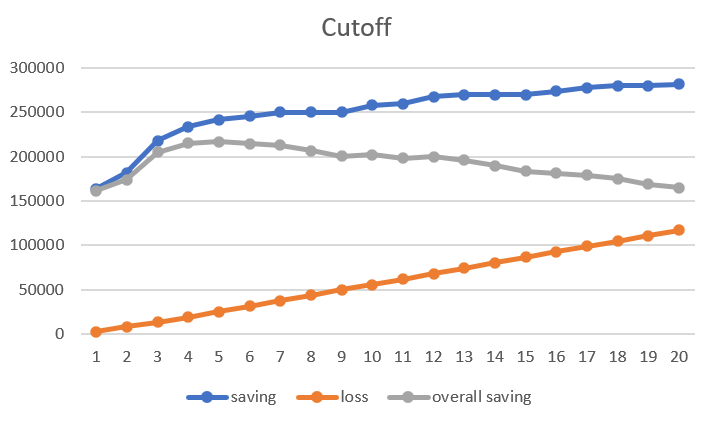

In [30]:
from IPython.display import Image
Image(filename="Capture.PNG")

### 4% and 5% don't have a large difference. To satisfy customers, we choose 4% as the cutoff, which will generate the overall saving of 215000